In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Telco_Customer_Churn_Analysis.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges'].dtype

dtype('O')

In [9]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [12]:
df = df.dropna()

In [13]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [14]:
churn_rate = df['Churn'].value_counts(normalize=True)*100
churn_rate

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

## Insight: Overall Churn Rate
#### The overall churn rate is approximately 27%, indicating a significant retention challenge for the business.

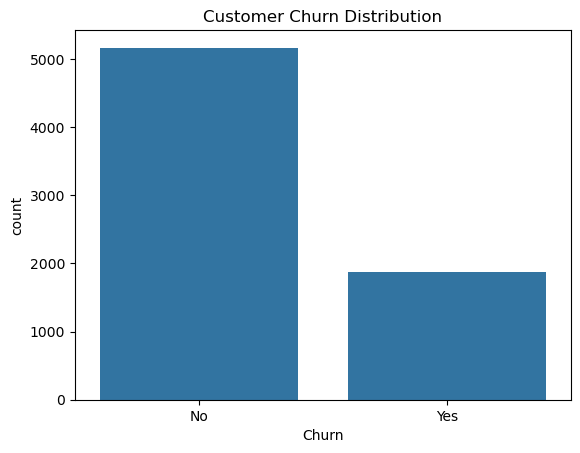

In [15]:
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Churn Analysis By Contract 

In [17]:
df.groupby('Contract')['Churn'].value_counts(normalize=True)*100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.722826
                Yes      11.277174
Two year        No       97.151335
                Yes       2.848665
Name: proportion, dtype: float64

## Insight: Contract Type Impact

#### Customers on month-to-month contracts exhibit significantly higher churn compared to customers on long-term contracts.

## Churn By Internet Service

In [18]:
df.groupby('InternetService')['Churn'].value_counts(normalize=True)*100

InternetService  Churn
DSL              No       81.001656
                 Yes      18.998344
Fiber optic      No       58.107235
                 Yes      41.892765
No               No       92.565789
                 Yes       7.434211
Name: proportion, dtype: float64

## Churn By Payment Method

In [19]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)*100

PaymentMethod              Churn
Bank transfer (automatic)  No       83.268482
                           Yes      16.731518
Credit card (automatic)    No       84.746877
                           Yes      15.253123
Electronic check           No       54.714588
                           Yes      45.285412
Mailed check               No       80.798005
                           Yes      19.201995
Name: proportion, dtype: float64

In [20]:
df.groupby('gender')['Churn'].value_counts(normalize=True)*100

gender  Churn
Female  No       73.040482
        Yes      26.959518
Male    No       73.795435
        Yes      26.204565
Name: proportion, dtype: float64

## Churn By Tenure

In [38]:
df.groupby('tenure')['Churn'].value_counts(normalize=True)*100

tenure  Churn
1       Yes      61.990212
        No       38.009788
2       Yes      51.680672
        No       48.319328
3       No       53.000000
                   ...    
70      Yes       9.243697
71      No       96.470588
        Yes       3.529412
72      No       98.342541
        Yes       1.657459
Name: proportion, Length: 144, dtype: float64

In [21]:
bins=[0,6,12,24,60]
labels=['0-6 months','7-12 months','13-24 months','25+ months']
df['TenureGroup']=pd.cut(df['tenure'],bins=bins,labels=labels)
df['TenureGroup']

0         0-6 months
1         25+ months
2         0-6 months
3         25+ months
4         0-6 months
            ...     
7038    13-24 months
7039             NaN
7040     7-12 months
7041      0-6 months
7042             NaN
Name: TenureGroup, Length: 7032, dtype: category
Categories (4, object): ['0-6 months' < '7-12 months' < '13-24 months' < '25+ months']

In [37]:
df.groupby('TenureGroup')['Churn'].value_counts(normalize=True)*100

C:\Users\Ashika\AppData\Local\Temp\ipykernel_22936\3057478861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureGroup')['Churn'].value_counts(normalize=True)*100


TenureGroup   Churn
0-6 months    Yes      53.333333
              No       46.666667
7-12 months   No       64.113475
              Yes      35.886525
13-24 months  No       71.289062
              Yes      28.710938
25+ months    No       81.657049
              Yes      18.342951
Name: proportion, dtype: float64

## Insight: Early Tenure Risk

#### Churn is highest among customers in their first six months, highlighting onboarding as a critical retention phase.

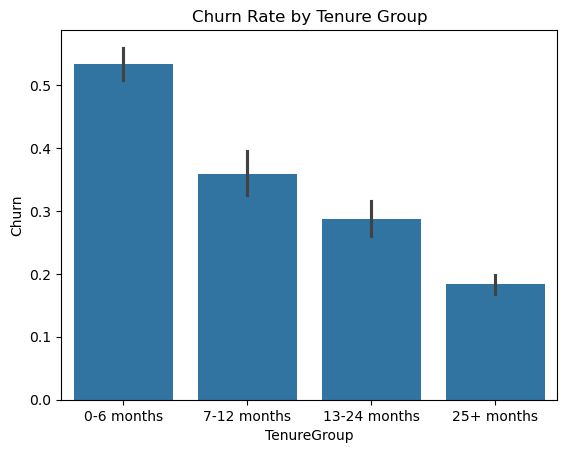

In [23]:
sns.barplot(x=df['TenureGroup'],y=df['Churn'].eq('Yes').astype(int))
plt.title('Churn Rate by Tenure Group')
plt.show()

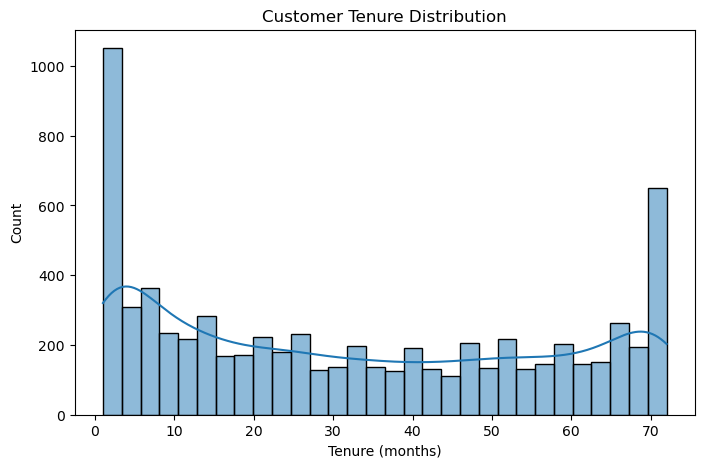

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=df['tenure'],bins=30,kde=True)
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.show()

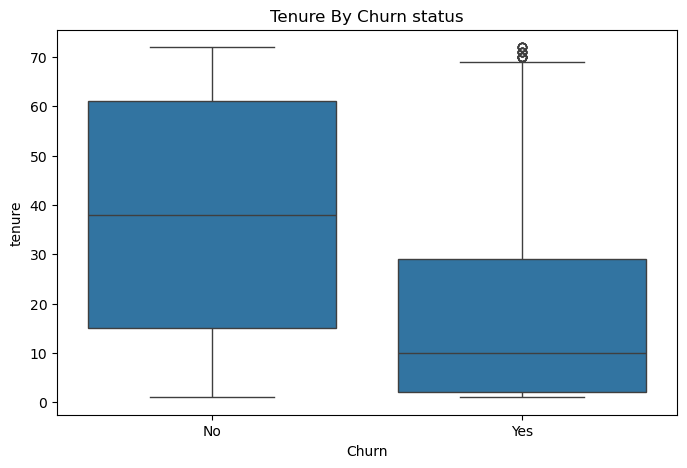

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title('Tenure By Churn status')
plt.show()

In [34]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


## Key Insights

1. Overall Churn Level
   The overall churn rate is approximately **27%**
2. Contract Type Impact
   Customers on **month-to-month contracts** exhibit substantially higher churn compared to customers on one-year       and two-year contracts. This suggests that shorter commitment plans are associated with lower customer loyalty       and higher switching behavior.
3. Early Tenure Risk
   Churn is highest among customers in their **first six months** of subscription. This indicates that the early        customer lifecycle stage is the most vulnerable period, making onboarding and early engagement critical for          retention.
4. Service & Payment Patterns
   Certain service types and payment methods show elevated churn rates.
   Customers using electronic check payment methods tend to churn more frequently, which may indicate lower             engagement or weaker customer commitment.
5. Customer Lifetime Differences
   Churned customers generally have significantly lower average tenure compared to retained customers.
   This confirms that customers who remain longer are more likely to become loyal and stable contributors to revenue.

## Recommendations

Recommendation 1 — Improve Early Retention
Because early tenure churn is high:
    Implement stronger onboarding programs and early engagement campaigns within the first three months to reduce   early churn.

Recommendation 2 — Promote Long-Term Contracts
Because month-to-month churn is high:
    Encourage customers to switch to long-term contracts through loyalty discounts or bundled offers.

Recommendation 3 — Target High-Risk Segments
Because specific segments churn more:
    Develop targeted retention strategies for high-risk customer segments, such as personalized offers or improved customer support.